# Exercise 5 

## 5.a Generate the set.

In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.cm as cm

import pandas as pd

# for creating a responsive plot
%matplotlib inline

In [2]:
def generate_data():
    # Construct X matrix [1, x1, x2, x1*x2]
    X = np.random.uniform(low=0,high=10,size=(30,1))

    # define theta
    theta = 2

    # define normal error
    n = np.random.normal(0,np.sqrt(64),len(X))

    # Define y using only x1, x2
    y = theta * (X.T) + n

    #prin X and y
    return(np.concatenate((X, y.reshape(-1,1), n.reshape(-1,1)), axis=1))

def yield_index(ds, num):
    """
    Function to return a virtual dataset from a np array with 30 data points per dataset
    Input:  an array containing all dataset, in order
            the requested dataset point (ex. in order to fetch dataset 30 num should be 30)
    Output: the range in which the specific dataset can be found
    """
    return ds[num*30-30: num*30]

# Geneerate 50 datasets
data = np.empty((1,3))
for i in range(50):
    data = np.concatenate((data, generate_data()))
data = data[1:]

X_all = data[:,0]
y_all = data[:,1]
data[:,:5]

array([[ 4.54342735,  9.96753916,  0.88068447],
       [ 7.56474221, 10.85811453, -4.27136988],
       [ 8.11494008, 24.4602244 ,  8.23034424],
       ...,
       [ 0.16736766, -9.56594507, -9.9006804 ],
       [ 8.43933605, 25.98851864,  9.10984655],
       [ 0.73239391, -3.45024141, -4.91502922]])

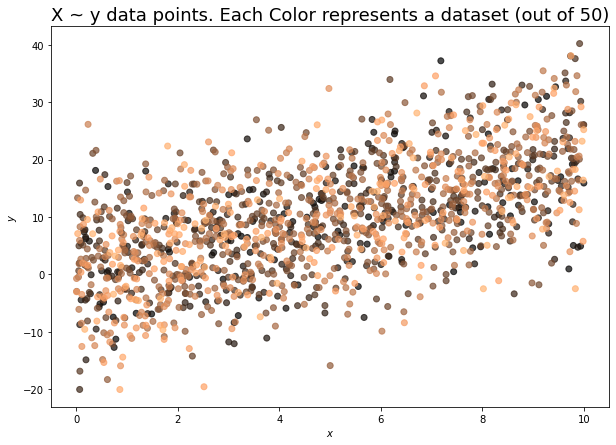

In [3]:
# Create 50 shades of color
colormap = plt.cm.copper #nipy_spectral, Set1,Paired  
colorst = [colormap(i) for i in np.linspace(0, 0.9,50)] 

#plot X data
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
for i in range(50):
    ax.scatter(yield_index(X_all, i+1),yield_index(y_all, i+1), c=[colorst[i]]*30,marker='o', alpha = 0.7)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('X ~ y data points. Each Color represents a dataset (out of 50)', fontsize=18)
plt.show()

## 6.b Calculate LS estimates of $\theta$

In [4]:
# Calculate \theta
theta = []
for i in range(50):
    X = yield_index(X_all, i+1)
    y = yield_index(y_all, i+1)
    XX = X.dot(X.T)
    Xy = X.dot(y.T)
    theta.append(Xy/(XX))
theta = np.array(theta).reshape(-1,1)
theta[:5]    

array([[1.89790379],
       [1.9932325 ],
       [1.422784  ],
       [2.55931934],
       [1.82579796]])

## 6.c 

### 6.c1 Estimate the $MSE = E[(\hat\theta - \theta_0)^2]$

In [5]:
mse = np.power((np.full((50), 2) - theta),2).mean()
print(f"The MSE is: {mse:.3f}")

The MSE is: 0.066


### 6.c2 depict graphically the values of $\hat\theta_1, \dots, \hat\theta_d$ and comment.

Looking at the histogram below, we could say that the estimates of $\theta$ follow (kind of) a normal distribution, spread around the value of 2, which is the actual value of $\theta$. This is explained due to the noise, which follows a normal distibution with a mean of zero and a standard deviation of 64. Comparing the histograms of the noise and the theta estimates we can see that the standard deviation in also the same (althought the scale differs). 

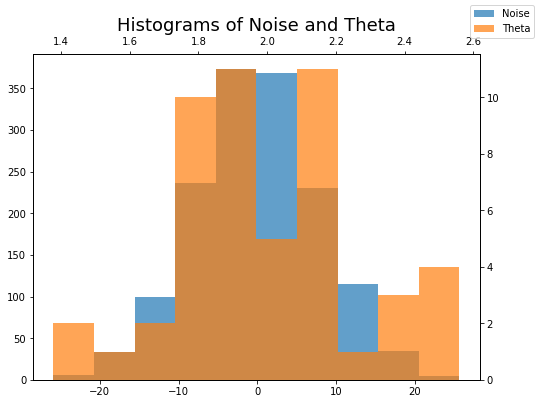

In [6]:
fig, ax1 = plt.subplots(figsize=(8, 6))
ax2 = ax1.twiny().twinx()
ax2.hist(theta, color='C1', alpha=0.7, label='Theta')
ax1.hist(data[:,2], color='C0', alpha=0.7, label='Noise')
fig.legend()
ax1.set_title('Histograms of Noise and Theta', fontsize=18)
plt.show()